# IFSCube examples

This notebook contains some examples of the functionalities of the IFSCube package and the gmosdc class. We recommend following the examples in this notebook in conjuction with the IFSCube manual, as that document has far more detailed explanations.

We begin by importing relevant modules and loading the data cube as a *gmosdc* object. We are also setting the redshift for the data cube as 0.008.

In [1]:
import matplotlib.pyplot as plt
import ifscube.cubetools as ct

# only necessary in the notebook
%matplotlib inline

mycube = ct.gmosdc('ngc3081_cube.fits', redshift=0.008, var_ext=2)

## Basic Functions

### Plotting the spectrum

You can plot the spectrum of any spaxel with the plotspec function. For this example we choose to plot the spectrum of the spaxel 2, 3 (x, y).

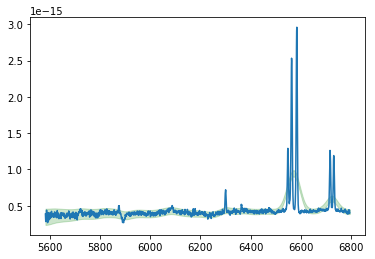

In [2]:
mycube.plotspec(2, 3)

It is also possible to plot the avarage spectrum of a group of spaxels. Just change the coordinates to any iterable variable, such as a list, with the starting and ending spaxel as the first and second elements. In the next example the avarage spectrum of the spaxels with $1 \le x < 3$ and $2 \le y < 5$ is plotted.

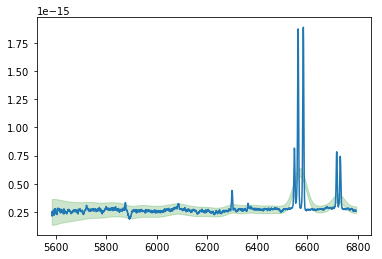

In [3]:
mycube.plotspec([1,3], [2,5])

### Image from wavelength cut

In order to get an image of the data cube at an specific wavelength you can use the *wlprojection* function.

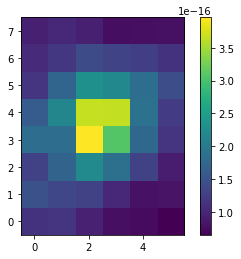

In [4]:
plt.imshow(mycube.wlprojection(6000, 100), origin='lower')
plt.colorbar()

## Spectral Fitting

We start by defining the initial guess $p_0$.

In [5]:
p0 = [
    1e-14,
    6584.0,
    3.0,
]

Next the complete call to fit the individual spectrum of the spaxel (3, 3), within the wavelengths 6450 and 6700.

In [6]:
myfit = mycube.linefit(p0, function='gaussian', fitting_window=(6450, 6700), individual_spec=(3, 3))

 0%


We can check the results by plotting the fit.

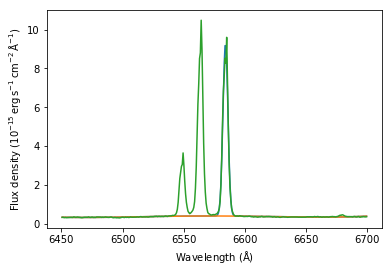

A         wl        s         
  8.90e-15   6584.18      2.03



In [7]:
mycube.plotfit(3, 3)